In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

In [211]:
orig_df = pd.read_csv("../Resources/telecom_customer_churn.csv")
orig_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [212]:
orig_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [213]:
mylist = list(orig_df.select_dtypes(exclude=['object']).columns)
print(mylist)

kmean_df = orig_df[mylist]
kmean_df.head()

['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54


In [214]:
kmean_df.drop('Zip Code', axis=1, inplace=True)
kmean_df.drop('Latitude', axis=1, inplace=True)
kmean_df.drop('Longitude', axis=1, inplace=True)
kmean_df.drop('Monthly Charge', axis=1, inplace=True)
kmean_df.drop('Total Refunds', axis=1, inplace=True)
kmean_df.drop('Total Charges', axis=1, inplace=True)
kmean_df.drop('Total Extra Data Charges', axis=1, inplace=True)
kmean_df.drop('Total Long Distance Charges', axis=1, inplace=True)
kmean_df.drop('Total Revenue', axis=1, inplace=True)



c:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [215]:
print("Dataframe size: is",len(kmean_df))
kmean_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True)
print("Dataframe size after drop is",len(kmean_df))

Dataframe size: is 7043
Dataframe size after drop is 4835


c:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [216]:
kmean_df.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download
0,37,0,2,9,42.39,16.0
1,46,0,0,9,10.69,10.0
2,50,0,0,4,33.65,30.0
3,78,0,1,13,27.82,4.0
4,75,0,3,3,7.38,11.0


In [217]:
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(4835, 2)

In [218]:
#2. Apply K-Means to the Data
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
#kmeans.fit_predict method returns the array of cluster labels each data point belongs to. 

print(label)

[3 5 3 ... 8 6 7]


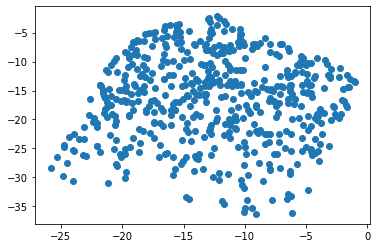

In [219]:
#3. Plotting Label 0 K-Means Clusters
#Let’s visualize cluster with label 0 using the matplotlib library.

 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

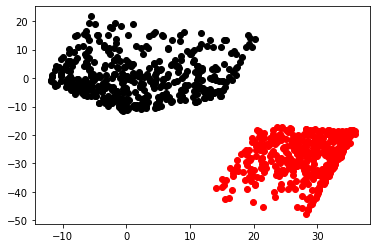

In [220]:
#4. Plotting Additional K-Means Clusters

#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

[0 1 2 3 4 5 6 7 8 9]


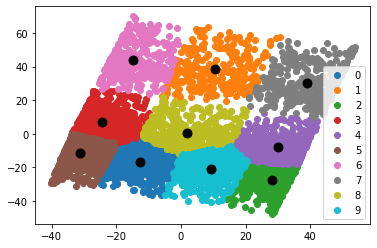

In [221]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

print(u_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

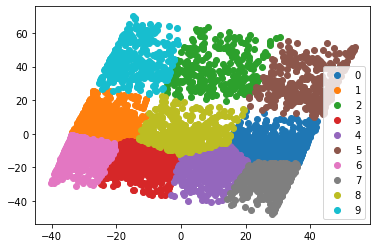

In [222]:
#Importing required modules
 
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

https://www.askpython.com/python/examples/plot-k-means-clusters-python

In [223]:
cols = kmean_df.columns

ms = MinMaxScaler()

X = ms.fit_transform(kmean_df)

X = pd.DataFrame(X, columns=[cols])

X.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download
0,0.295082,0.0,0.181818,0.112676,0.844835,0.168675
1,0.442623,0.0,0.000000,0.112676,0.197632,0.096386
2,0.508197,0.0,0.000000,0.042254,0.666394,0.337349
3,0.967213,0.0,0.090909,0.169014,0.547366,0.024096
4,0.918033,0.0,0.272727,0.028169,0.130053,0.108434


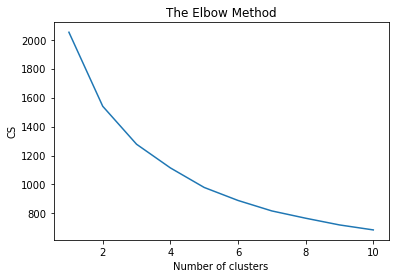

In [224]:

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

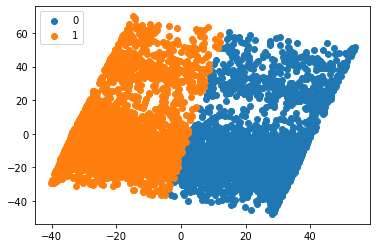

In [225]:
#Importing required modules
 
 
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

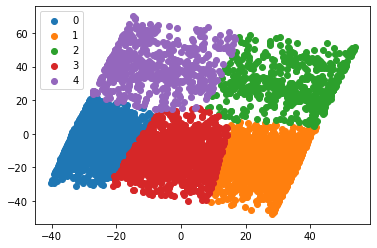

In [226]:
#Importing required modules

 
#Load Data
data = kmean_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

[0 1 2 3 4]


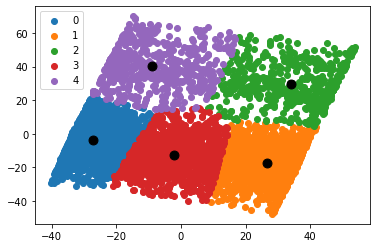

In [227]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

print(u_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm#:~:text=K%2DMeans%20clustering%20is%20an,objects%20belonging%20to%20another%20cluster.

In [228]:
norm_data = normalize(kmean_df, norm="l1", axis=0)
norm_data = pd.DataFrame(columns=kmean_df.columns, data=norm_data)

scaler = MinMaxScaler()
m_norm_data = normalize(kmean_df, norm="max", axis=0)
m_norm_data = pd.DataFrame(columns=kmean_df.columns, data=m_norm_data)  # convert back to a dataframe

norm_data = pd.DataFrame(columns=kmean_df.columns, data=norm_data)

print(norm_data.head(5))
print(norm_data.info())

        Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0  0.000160                   0.0             0.000218          0.000056   
1  0.000199                   0.0             0.000000          0.000056   
2  0.000217                   0.0             0.000000          0.000025   
3  0.000338                   0.0             0.000109          0.000081   
4  0.000325                   0.0             0.000328          0.000019   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  
0                           0.000343                 0.000127  
1                           0.000086                 0.000079  
2                           0.000272                 0.000238  
3                           0.000225                 0.000032  
4                           0.000060                 0.000087  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 6 columns):
 #   Column                             Non-Null Coun

In [229]:
corr_matrix = norm_data.corr()
print(corr_matrix)

                                        Age  Number of Dependents  \
Age                                1.000000             -0.123059   
Number of Dependents              -0.123059              1.000000   
Number of Referrals               -0.023698              0.274571   
Tenure in Months                  -0.010313              0.135130   
Avg Monthly Long Distance Charges -0.024382             -0.004698   
Avg Monthly GB Download           -0.567253              0.298804   

                                   Number of Referrals  Tenure in Months  \
Age                                          -0.023698         -0.010313   
Number of Dependents                          0.274571          0.135130   
Number of Referrals                           1.000000          0.349465   
Tenure in Months                              0.349465          1.000000   
Avg Monthly Long Distance Charges            -0.003733          0.009926   
Avg Monthly GB Download                       0.078010      

In [230]:
RAND_STATE=50  # for reproducibility and consistency
folds=3
k_fold = KFold(n_splits=folds, shuffle=True)  # setting generator for k-fold splitting

In [231]:
# Dictionary of hyperparameters to iterate through
# GridSearchCV will try every combination of these hyperparameters and
# return the model with the best score via KFold validation
hyperparams = {
    "n_clusters": [2, 3, 4, 5, 6, 7, 8, 9],
    "n_init": [10, 15, 20],
    "max_iter": [100, 200, 300, 400, 500],
    "tol": [.0000001, .000001, .00001, .0001],
}

k_means = KMeans()  # sets jobs equal to number of cores

ensemble = GridSearchCV(
    estimator=k_means,
    param_grid=hyperparams,
    cv=k_fold,
    n_jobs=-1
)

In [238]:
ensemble.fit(norm_data)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=KMeans(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_init': [10, 15, 20],
                         'tol': [1e-07, 1e-06, 1e-05, 0.0001]})

In [236]:
GridSearchCV(cv=KFold(n_splits=3, shuffle=True),
       error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, 
       random_state=None, tol=0.0001, verbose=0),
       n_jobs=-1,
       param_grid={'max_iter': [100, 200, 300, 400, 500], 'n_init': [10, 15, 20], 'tol': [1e-07, 1e-06, 1e-05, 0.0001], 'n_clusters': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise', estimator=KMeans(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': [2, 3, 4, 5, 6], 'n_init': [10, 15, 20],
                         'tol': [1e-07, 1e-06, 1e-05, 0.0001]},
             return_train_score=True)

In [237]:
# Generate labels for data with model with raw data, compute score
labels = ensemble.predict(norm_data)
score = silhouette_score(norm_data, labels)
print(score)
print(ensemble.best_params_)

0.30452959137236557
{'max_iter': 300, 'n_clusters': 9, 'n_init': 15, 'tol': 1e-05}


In [235]:
# hyperparameters to try out for binary classification with KNN
bin_params = {
    "n_init": [10, 15, 20],
    "max_iter": [100, 200, 300, 400, 500],
    "tol": [.0000001, .000001, .00001, .0001],
}

bin_k_means = KMeans(n_clusters=2)  # set 2 clusters

binary_ensemble = GridSearchCV(
    estimator=bin_k_means,
    param_grid=bin_params,
    cv=k_fold,
    n_jobs=-1
)

binary_ensemble.fit(norm_data)  # fit model to data and return best model

# Generate labels for data with model with raw data, compute score
bin_labels = binary_ensemble.predict(norm_data)
bin_score = silhouette_score(norm_data, bin_labels)

# Output score to user
print(bin_score)
print(binary_ensemble.best_params_)

0.6269721105431104
{'max_iter': 100, 'n_init': 10, 'tol': 1e-07}
